In [3]:
import torch
from model import UNetColor
from data_loader import PolygonColorDataset
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
# Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
COLOURS = ['cyan', 'purple', 'magenta', 'green', 'red', 'blue', 'yellow', 'orange']

# Load the trained model 
model = UNetColor(n_colors=len(COLOURS), embed_dim=16).to(device)
checkpoint = 'checkpoints/epoch029.pth'  
model.load_state_dict(torch.load(checkpoint, map_location=device))
model.eval()


/var/folders/c7/57bcmg_92jvbzmtznlxfjj2m0000gn/T/ipykernel_12287/2053581620.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint, 

UNetColor(
  (color_emb): Embedding(8, 16)
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(17, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): ReLU(inplace=True)
          (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (3): ReLU(inplace=True)
        )
      )
    )
  )
  (down2): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(128, 256, ke

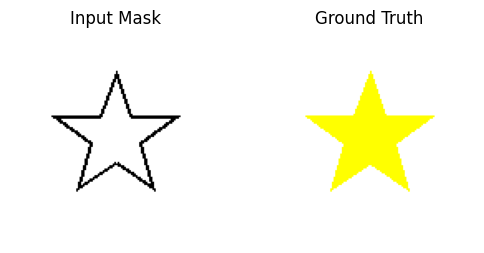

In [ ]:
# Prepare a validation example
ds = PolygonColorDataset('dataset/validation', COLOURS, img_size=(128, 128))
inp, cidx, tgt = ds[0]  # first example

# Visualize input mask and ground truth
#the input is first record of validation json file
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].imshow(inp.squeeze(0), cmap='gray')
axes[0].set_title('Input Mask')
axes[1].imshow(tgt.permute(1, 2, 0))
axes[1].set_title('Ground Truth')
for ax in axes:
    ax.axis('off')
plt.show()
